In [1]:
# Author: Arthur Prigent
# Email: aprigent@ictp.it

In [1]:
import Atools as Atools
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean.cm as cmo
from scipy.stats import pearsonr
from datetime import datetime
import cartopy.crs as ccrs
import cartopy
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
from matplotlib import gridspec
from scipy import stats
def nandetrend(y):
    ''' Remove the linear trend from the data '''
    
    x = np.arange(0,y.shape[0],1)
    m, b, r_val, p_val, std_err = stats.linregress(x,np.array(y))
    y_detrended= np.array(y) - m*x
    return y_detrended

def is_jfm(month):
    return (month>=1) & (month<=3)

def is_fma(month):
    return (month>=2) & (month<=4)

def is_mam(month):
    return (month>=3) & (month<=5)

def is_amj(month):
    return (month>=4) & (month<=6)

def is_mjj(month):
    return (month>=5) & (month<=7)

def is_jja(month):
    return (month>=6) & (month<=8)

def is_jas(month):
    return (month>=7) & (month<=9)

def is_aso(month):
    return (month>=8) & (month<=10)

def is_son(month):
    return (month>=9) & (month<=11)

def is_ond(month):
    return (month>=10) & (month<=12)

def is_ndj(month):
    return (month==11)|(month==12)|(month==1)

def is_djf(month):
    return (month==12)|(month==1)|(month==2)


def plot_regress_map(ax,ssta_detrended_std,levels,cmap):
    ftz=15
    
    p0=ax.contourf(ssta_detrended_std.lon,ssta_detrended_std.lat,ssta_detrended_std.alpha,
                      cmap=cmap,transform=ccrs.PlateCarree(),levels=levels,extend='both')
    #ax.add_patch(mpatches.Rectangle(xy=[-20, -3], width=20, height=6,edgecolor='blue',fill=None,
    #                                    alpha=1,linewidth=3,label='ATL3'))
    

    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='black', alpha=0.8, linestyle='-',zorder=3)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xlabel_style = {'size': ftz, 'color': 'black'}
    gl.ylabel_style = {'size': ftz, 'color': 'black'}
    gl.xlocator = mticker.FixedLocator([-40,-20, 0,20])
    gl.ylocator = mticker.FixedLocator([-20,-10, 0,10,20])
    ax.add_feature(cartopy.feature.LAND, edgecolor='black',color='lightgrey',zorder=2)
    #ax0.add_feature(cartopy.feature.BORDERS,zorder=2)# adds national borders
    ax.add_feature(cartopy.feature.COASTLINE,zorder=2)# add coastlines
    #ax[i].add_feature(cartopy.feature.RIVERS,zorder=2)# add rivers
    #ax.set_title(ssta_detrended_std.model.values,fontsize=ftz)
    return p0



In [2]:
dir_data1 = '/work/bb1153/b381638/ICON/ngc2013/'
dir_data2 = '/work/bb1153/b381638/ICON/rthk001/'

dir_ind = '/work/bb1153/b381602/ICON/indices/'
dir_ind2 = '/work/bb1153/b381602/ICON/'

# Load data and take the common time period

In [3]:

temp_1_eq_meridional_nomean = xr.open_dataset('data/temp_3S3N_ngc2013_no_mean.nc')
temp_2_eq_meridional_nomean = xr.open_dataset('data/temp_3S3N_rthk001_nomean.nc')


mld_1_eq_meridional_nomean = xr.open_dataset('data/mld_ngc2013_3S3N.nc')
mld_2_eq_meridional_nomean = xr.open_dataset('data/mld_rthk001_3S3N.nc')

In [46]:
temp_1_jja = temp_1_eq_meridional_nomean.sel(time=is_jja(temp_1_eq_meridional_nomean['time.month'])).groupby('time.year').mean()
temp_2_jja = temp_2_eq_meridional_nomean.sel(time=is_jja(temp_2_eq_meridional_nomean['time.month'])).groupby('time.year').mean()



mld_1_jja = mld_1_eq_meridional_nomean.sel(time=is_jja(mld_1_eq_meridional_nomean['time.month'])).groupby('time.year').mean()
mld_2_jja = mld_2_eq_meridional_nomean.sel(time=is_jja(mld_2_eq_meridional_nomean['time.month'])).groupby('time.year').mean()



temp_1_ond = temp_1_eq_meridional_nomean.sel(time=is_ond(temp_1_eq_meridional_nomean['time.month'])).groupby('time.year').mean()
temp_2_ond = temp_2_eq_meridional_nomean.sel(time=is_ond(temp_2_eq_meridional_nomean['time.month'])).groupby('time.year').mean()



mld_1_ond = mld_1_eq_meridional_nomean.sel(time=is_ond(mld_1_eq_meridional_nomean['time.month'])).groupby('time.year').mean()
mld_2_ond = mld_2_eq_meridional_nomean.sel(time=is_ond(mld_2_eq_meridional_nomean['time.month'])).groupby('time.year').mean()




zosa_1_jja = xr.open_dataset('data/zosa_ngc2013_jja.nc')
zosa_2_jja = xr.open_dataset('data/zosa_rthk001_jja.nc')


zosa_1_ond = xr.open_dataset('data/zosa_ngc2013_ond.nc')
zosa_2_ond = xr.open_dataset('data/zosa_rthk001_ond.nc')

In [47]:
zosa_1_jja_eq = Atools.data_sub(zosa_1_jja,-40,10,-1,1).mean(dim='lat')
zosa_2_jja_eq = Atools.data_sub(zosa_2_jja,-40,10,-1,1).mean(dim='lat')


zosa_1_ond_eq = Atools.data_sub(zosa_1_ond,-40,10,-1,1).mean(dim='lat')
zosa_2_ond_eq = Atools.data_sub(zosa_2_ond,-40,10,-1,1).mean(dim='lat')

In [48]:
zosa_1_jja_eq = zosa_1_jja_eq.where(zosa_1_jja_eq!=0)
zosa_2_jja_eq = zosa_2_jja_eq.where(zosa_2_jja_eq!=0)


zosa_1_ond_eq = zosa_1_ond_eq.where(zosa_1_ond_eq!=0)
zosa_2_ond_eq = zosa_2_ond_eq.where(zosa_2_ond_eq!=0)

In [49]:
#temp_1_eq_meridional_nomean_seasonal = temp_1_eq_meridional_nomean.groupby('time.month').mean()
#temp_2_eq_meridional_nomean_seasonal = temp_2_eq_meridional_nomean.groupby('time.month').mean()

# Linearly detrend

In [50]:
sst_atl_dtd_1 = np.ones((temp_1_eq_meridional_nomean.to.shape[0],
                         temp_1_eq_meridional_nomean.to.shape[1],
                         temp_1_eq_meridional_nomean.to.shape[2]))*np.nan
xdata_1 = np.arange(0,temp_1_eq_meridional_nomean.time.shape[0],1)
ydata_1_tmp = np.array(temp_1_eq_meridional_nomean.to)

for j in range(ydata_1_tmp.shape[1]):
    for k in range(ydata_1_tmp.shape[2]):
            sst_atl_dtd_1[:,j,k] = Atools.nandetrend(ydata_1_tmp[:,j,k])

temp_detrended_eq_1 = xr.Dataset({'temp': (['time','depth','lon'], sst_atl_dtd_1),
                               },
                      coords={
                              'time': np.array(temp_1_eq_meridional_nomean.time),
                              'lon': np.array(temp_1_eq_meridional_nomean.lon),
                              'depth':np.array(temp_1_eq_meridional_nomean.depth)})



sst_atl_dtd_2 = np.ones((temp_2_eq_meridional_nomean.to.shape[0],
                         temp_2_eq_meridional_nomean.to.shape[1],
                         temp_2_eq_meridional_nomean.to.shape[2]))*np.nan
xdata_2 = np.arange(0,temp_2_eq_meridional_nomean.time.shape[0],1)
ydata_2_tmp = np.array(temp_2_eq_meridional_nomean.to)

for j in range(ydata_2_tmp.shape[1]):
    for k in range(ydata_2_tmp.shape[2]):
            sst_atl_dtd_2[:,j,k] = Atools.nandetrend(ydata_2_tmp[:,j,k])

temp_detrended_eq_2 = xr.Dataset({'temp': (['time','depth','lon'], sst_atl_dtd_2),
                               },
                      coords={
                              'time': np.array(temp_2_eq_meridional_nomean.time),
                              'lon': np.array(temp_2_eq_meridional_nomean.lon),
                              'depth':np.array(temp_2_eq_meridional_nomean.depth)})





# Compute sst anomalies

In [51]:
tempa_detrended_eq_1,_ = Atools.ano_norm_t(temp_detrended_eq_1.temp)
tempa_detrended_eq_2,_ = Atools.ano_norm_t(temp_detrended_eq_2.temp)



In [52]:
tempa_1_jja = tempa_detrended_eq_1.sel(time=is_jja(tempa_detrended_eq_1['time.month'])).groupby('time.year').mean()
tempa_2_jja = tempa_detrended_eq_2.sel(time=is_jja(tempa_detrended_eq_2['time.month'])).groupby('time.year').mean()



tempa_1_ond = tempa_detrended_eq_1.sel(time=is_ond(tempa_detrended_eq_1['time.month'])).groupby('time.year').mean()
tempa_2_ond = tempa_detrended_eq_2.sel(time=is_ond(tempa_detrended_eq_2['time.month'])).groupby('time.year').mean()




In [53]:
tempa_1_jja_eq = tempa_1_jja.where((tempa_1_jja.lon>-40) &(tempa_1_jja.lon<10),drop=True)
tempa_2_jja_eq = tempa_2_jja.where((tempa_2_jja.lon>-40) &(tempa_2_jja.lon<10),drop=True)


tempa_1_ond_eq = tempa_1_ond.where((tempa_1_ond.lon>-40) &(tempa_1_ond.lon<10),drop=True)
tempa_2_ond_eq = tempa_2_ond.where((tempa_2_ond.lon>-40) &(tempa_2_ond.lon<10),drop=True)

In [54]:
std_tempa_1_jja_eq = tempa_1_jja_eq.std(dim='year')
std_tempa_2_jja_eq = tempa_2_jja_eq.std(dim='year')



std_tempa_1_ond_eq = tempa_1_ond_eq.std(dim='year')
std_tempa_2_ond_eq = tempa_2_ond_eq.std(dim='year')

# Make linear regressions

In [55]:
def reg_temp_zos(x,y):
    slope = np.ones((y.shape[1],y.shape[2]))*np.nan
    rval = np.ones((y.shape[1],y.shape[2]))*np.nan
    pval = np.ones((y.shape[1],y.shape[2]))*np.nan


    for i in range(slope.shape[0]):
        for j in range(slope.shape[1]):
            if np.isfinite(y[0,i,j])==True and np.isfinite(x[0,j])==True:
                slope[i,j], _, rval[i,j], pval[i,j], _ = stats.linregress(x[:,j],np.array(y[:,i,j]))

    thermocline_feedback = xr.Dataset({'slope': (['depth','lon'], slope),
                                       'rval': (['depth','lon'], rval),
                                       'pval': (['depth','lon'], pval),
                               },
                      coords={
                              'lon': np.array(y.lon),
                              'depth':np.array(y.depth)})

    return thermocline_feedback

In [57]:
thermocline_feedback_1 = reg_temp_zos(zosa_1_jja_eq.zos,tempa_1_jja_eq)
thermocline_feedback_2 = reg_temp_zos(zosa_2_jja_eq.zos,tempa_2_jja_eq)



thermocline_feedback_1_ond = reg_temp_zos(zosa_1_ond_eq.zos,tempa_1_ond_eq)
thermocline_feedback_2_ond = reg_temp_zos(zosa_2_ond_eq.zos,tempa_2_ond_eq)

In [59]:
mld_1_jja_mean = mld_1_jja.mean(dim='year')
mld_2_jja_mean = mld_2_jja.mean(dim='year')


mld_1_ond_mean = mld_1_ond.mean(dim='year')
mld_2_ond_mean = mld_2_ond.mean(dim='year')

In [60]:
mld_1_jja_eq_mean = mld_1_jja_mean.where((mld_1_jja_mean.lon>-40) &(mld_1_jja_mean.lon<10),drop=True)
mld_2_jja_eq_mean = mld_2_jja_mean.where((mld_2_jja_mean.lon>-40) &(mld_2_jja_mean.lon<10),drop=True)

mld_1_ond_eq_mean = mld_1_ond_mean.where((mld_1_ond_mean.lon>-40) &(mld_1_ond_mean.lon<10),drop=True)
mld_2_ond_eq_mean = mld_2_ond_mean.where((mld_2_ond_mean.lon>-40) &(mld_2_ond_mean.lon<10),drop=True)

In [61]:
temp_1_jja_mean = temp_1_jja.mean(dim='year')
temp_2_jja_mean = temp_2_jja.mean(dim='year')
                                  
                                  
temp_1_jja_eq_mean = temp_1_jja_mean.where((temp_1_jja_mean.lon>-40) &(temp_1_jja_mean.lon<10),drop=True)
temp_2_jja_eq_mean = temp_2_jja_mean.where((temp_2_jja_mean.lon>-40) &(temp_2_jja_mean.lon<10),drop=True) 



temp_1_ond_mean = temp_1_ond.mean(dim='year')
temp_2_ond_mean = temp_2_ond.mean(dim='year')
                                  
                                  
temp_1_ond_eq_mean = temp_1_ond_mean.where((temp_1_ond_mean.lon>-40) &(temp_1_ond_mean.lon<10),drop=True)
temp_2_ond_eq_mean = temp_2_ond_mean.where((temp_2_ond_mean.lon>-40) &(temp_2_ond_mean.lon<10),drop=True) 

# figures

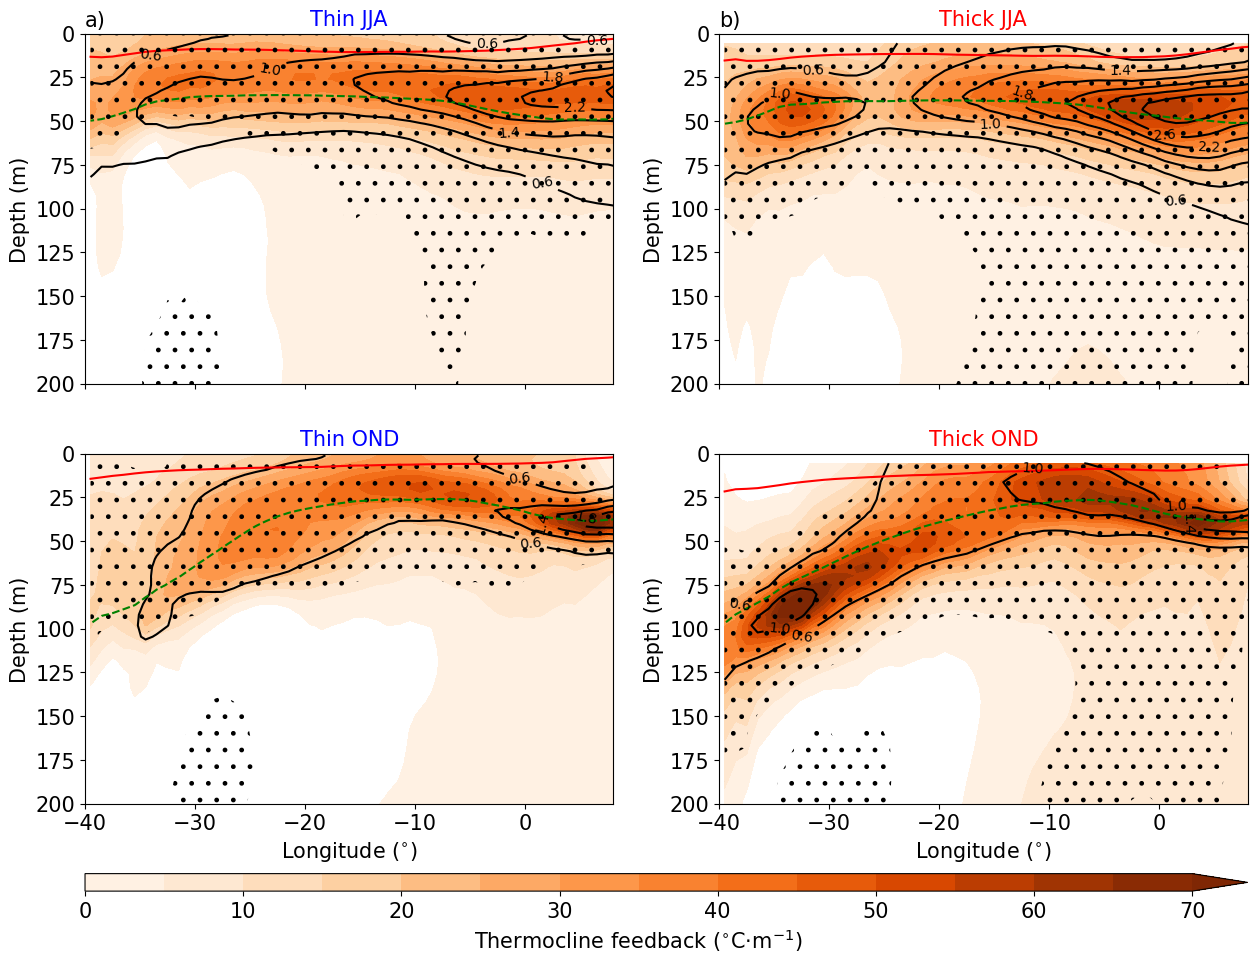

In [84]:
f,ax = plt.subplots(2,2,figsize=[15,10],sharex=True)

ax=ax.ravel()
cmap = plt.cm.Oranges
levels= np.arange(0,75,5)
ftz = 15
levels1= np.arange(0.6,3.4,0.4)
cax1 = inset_axes(ax[2],
                   width="220%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.25, 1, 1),
                   bbox_transform=ax[2].transAxes,
                   borderpad=0,
                   )

cs0 = ax[0].contour(std_tempa_1_jja_eq.lon,std_tempa_1_jja_eq.depth,std_tempa_1_jja_eq,levels=levels1,colors='black')
ax[0].clabel(cs0, inline=1, fontsize=10)

ax[0].contourf(thermocline_feedback_1.lon,thermocline_feedback_1.depth,thermocline_feedback_1.slope,cmap=cmap,levels=levels,extend='max')
ax[0].plot(mld_1_jja_eq_mean.lon,mld_1_jja_eq_mean.mlotst,color='red')
cs0 = ax[0].contour(temp_1_jja_eq_mean.lon,temp_1_jja_eq_mean.depth,temp_1_jja_eq_mean.to,levels=[23],colors='green',linestyles='--')

c1b = ax[0].contourf(thermocline_feedback_1.lon,thermocline_feedback_1.depth,thermocline_feedback_1.pval,[np.min(thermocline_feedback_1.pval),0.05,np.max(thermocline_feedback_1.pval)],
                      zorder=2,
                          hatches=['.', None],colors="none")


ax[0].invert_yaxis()
ax[0].set_ylim([200,0])
ax[0].set_xlim([-40,8])
ax[0].tick_params(labelsize=ftz)
ax[0].set_ylabel('Depth (m)',fontsize=ftz)
ax[0].set_title('Thin JJA',fontsize=ftz,color='blue')

cs0 = ax[1].contour(std_tempa_2_jja_eq.lon,std_tempa_2_jja_eq.depth,std_tempa_2_jja_eq,levels=levels1,colors='black')
ax[1].clabel(cs0, inline=1, fontsize=10)

p1 = ax[1].contourf(thermocline_feedback_2.lon,thermocline_feedback_2.depth,thermocline_feedback_2.slope,cmap=cmap,levels=levels,extend='max')
c1b = ax[1].contourf(thermocline_feedback_2.lon,thermocline_feedback_2.depth,thermocline_feedback_2.pval,[np.min(thermocline_feedback_2.pval),0.05,np.max(thermocline_feedback_2.pval)],
                      zorder=2,
                          hatches=['.', None],colors="none")


ax[1].plot(mld_2_jja_eq_mean.lon,mld_2_jja_eq_mean.mlotst,color='red',label='MLD')
ax[1].contour(temp_2_jja_eq_mean.lon,temp_2_jja_eq_mean.depth,temp_2_jja_eq_mean.to,levels=[23],colors='green',linestyles='--')
ax[1].invert_yaxis()
ax[1].set_ylim([200,0])
ax[1].set_ylabel('Depth (m)',fontsize=ftz)

ax[1].tick_params(labelsize=ftz)
ax[1].set_title('Thick JJA',fontsize=ftz,color='red')
ax[1].set_xlim([-40,8])
ax[0].text(0,
         1.02, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.02, 'b)',transform=ax[1].transAxes,size=ftz)

cbar = plt.colorbar(p1,cax1,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'Thermocline feedback ($^{\circ}$C$\cdot$m$^{-1}$)', size=ftz)






cs0 = ax[2].contour(std_tempa_1_ond_eq.lon,std_tempa_1_ond_eq.depth,std_tempa_1_ond_eq,levels=levels1,colors='black')
ax[2].clabel(cs0, inline=1, fontsize=10)

ax[2].contourf(thermocline_feedback_1_ond.lon,thermocline_feedback_1_ond.depth,thermocline_feedback_1_ond.slope,cmap=cmap,levels=levels,extend='max')
c1b = ax[2].contourf(thermocline_feedback_1_ond.lon,
                     thermocline_feedback_1_ond.depth,
                     thermocline_feedback_1_ond.pval,[np.min(thermocline_feedback_1_ond.pval),0.05,np.max(thermocline_feedback_1_ond.pval)],
                      zorder=2,
                          hatches=['.', None],colors="none")

ax[2].plot(mld_1_ond_eq_mean.lon,mld_1_ond_eq_mean.mlotst,color='red')
cs0 = ax[2].contour(temp_1_ond_eq_mean.lon,temp_1_ond_eq_mean.depth,temp_1_ond_eq_mean.to,levels=[23],colors='green',linestyles='--')

ax[2].invert_yaxis()
ax[2].set_ylim([200,0])
ax[2].set_xlim([-40,8])
ax[2].tick_params(labelsize=ftz)
ax[2].set_ylabel('Depth (m)',fontsize=ftz)
ax[2].set_title('Thin OND',fontsize=ftz,color='blue')
ax[2].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)



cs0 = ax[3].contour(std_tempa_2_ond_eq.lon,std_tempa_2_ond_eq.depth,std_tempa_2_ond_eq,levels=levels1,colors='black')
ax[3].clabel(cs0, inline=1, fontsize=10)

p1 = ax[3].contourf(thermocline_feedback_2_ond.lon,thermocline_feedback_2_ond.depth,thermocline_feedback_2_ond.slope,cmap=cmap,levels=levels,extend='max')
c1b = ax[3].contourf(thermocline_feedback_2_ond.lon,
                     thermocline_feedback_2_ond.depth,
                     thermocline_feedback_2_ond.pval,[np.min(thermocline_feedback_2_ond.pval),0.05,np.max(thermocline_feedback_2_ond.pval)],
                      zorder=2,
                          hatches=['.', None],colors="none")
ax[3].plot(mld_2_ond_eq_mean.lon,mld_2_ond_eq_mean.mlotst,color='red',label='MLD')
ax[3].contour(temp_2_ond_eq_mean.lon,temp_2_ond_eq_mean.depth,temp_2_ond_eq_mean.to,levels=[23],colors='green',linestyles='--')
ax[3].invert_yaxis()
ax[3].set_ylim([200,0])
ax[3].set_ylabel('Depth (m)',fontsize=ftz)
ax[3].set_xlabel('Longitude ($^{\circ}$)',fontsize=ftz)
ax[3].tick_params(labelsize=ftz)
ax[3].set_title('Thick OND',fontsize=ftz,color='red')
ax[3].set_xlim([-40,8])



plt.savefig('figures/figure_subsurface_thermocline_feedback_JJA_OND_eq_atl.png',
             dpi = 300,
            bbox_inches='tight')

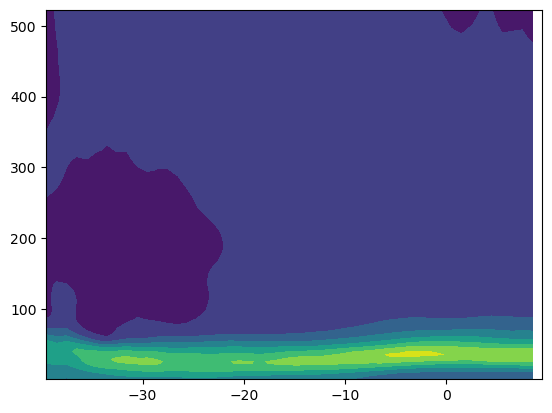

In [100]:
plt.contourf(thermocline_feedback_1.lon,thermocline_feedback_1.depth,thermocline_feedback_1.slope)


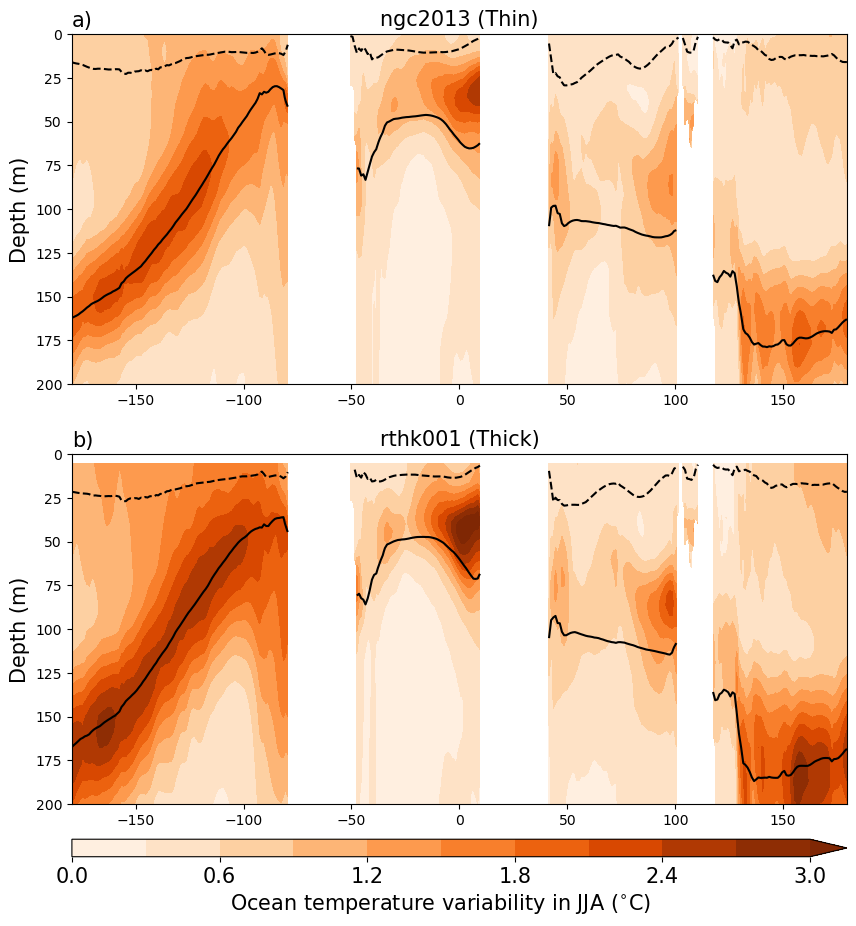

In [65]:
f,ax = plt.subplots(2,1,figsize=[10,10])
levels= np.arange(0,3.3,0.3)
cmap = plt.cm.Oranges
ax=ax.ravel()
ftz=15

cax0 = inset_axes(ax[1],
                   width="100%",  # width = 5% of parent_bbox width
                   height="5%",  # height : 50%
                   loc='lower left',
                   bbox_to_anchor=(0, -0.15, 1, 1),
                   bbox_transform=ax[1].transAxes,
                   borderpad=0,
                   )


p0 = ax[0].contourf(std_tempa_1_jja.lon,
               std_tempa_1_jja.depth,
               std_tempa_1_jja,
              levels=levels,
              cmap=cmap,extend='max')

ax[0].contour(temp_1_jja_mean.lon,
               temp_1_jja_mean.depth,
               temp_1_jja_mean,
              levels=[20],colors='black')


ax[0].plot(mld_1_jja_mean.lon,mld_1_jja_mean.where(mld_1_jja_mean>1),color='black',linestyle='--')

ax[0].set_ylim([0,200])

ax[0].invert_yaxis()
ax[0].set_title('ngc2013 (Thin)',fontsize=ftz)
ax[0].set_ylabel('Depth (m)',fontsize=ftz)


ax[1].contourf(std_tempa_2_jja.lon,
               std_tempa_2_jja.depth,
               std_tempa_2_jja,
              levels=levels,
              cmap=cmap,extend='max')

ax[1].contour(temp_2_jja_mean.lon,
               temp_2_jja_mean.depth,
               temp_2_jja_mean,
              levels=[20],colors='black')
ax[1].set_ylim([0,200])

ax[1].invert_yaxis()
ax[1].set_title('rthk001 (Thick)',fontsize=ftz)
ax[1].set_ylabel('Depth (m)',fontsize=ftz)


ax[1].plot(mld_2_jja_mean.lon,mld_2_jja_mean.where(mld_2_jja_mean>5.6),color='black',linestyle='--')


ax[0].text(0,
         1.02, 'a)',transform=ax[0].transAxes,size=ftz)
ax[1].text(0,
         1.02, 'b)',transform=ax[1].transAxes,size=ftz)


cbar = plt.colorbar(p0,cax0,orientation='horizontal')
cbar.ax.tick_params(labelsize=ftz)
cbar.set_label(r'Ocean temperature variability in JJA ($^{\circ}$C)', size=ftz)

plt.savefig('figures/figure_ocean_temperature_variability_3S3N_top200m.png',
             dpi = 300,
            bbox_inches='tight')
#


#### Save data

In [26]:
#ssta_1_jja.to_netcdf('data/ssta_atl3_jja_ngc2013.nc')
#ssta_2_jja.to_netcdf('data/ssta_atl3_jja_rtkh001.nc')
#
#
#tauua_1_jja_atl4.to_netcdf('data/tauua_atl4_jja_ngc2013.nc')
#tauua_2_jja_atl4.to_netcdf('data/tauua_atl4_jja_rtkh001.nc')

In [11]:
def regress_xy(x,y):

    alpha = np.ones((y.shape[1],y.shape[2]))*np.nan
    rval = np.ones((y.shape[1],y.shape[2]))*np.nan
    pval = np.ones((y.shape[1],y.shape[2]))*np.nan
    for i in range(alpha.shape[0]):
        for j in range(alpha.shape[1]):
            alpha[i,j], _ , rval[i,j],pval[i,j],_ = stats.linregress(x[:],y[:,i,j])
            
    regression = xr.Dataset({'alpha': (['lat','lon'], alpha),
                             'rval': (['lat','lon'], rval),
                             'pval': (['lat','lon'], pval),
                               },
                      coords={
                              
                              'lat': np.array(y.lat),
                              'lon':np.array(y.lon)})
            
    return regression

In [12]:
bf1_1 = regress_xy(ssta_1_jja,tauua_1_jja)
bf1_2 = regress_xy(ssta_2_jja,tauua_2_jja)